# Logistic Regression

#### Binary classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("files/age_insurance.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


The above dataframe , see that the value 0 in bought_insurance is No for that age catogory and 1 for yes.

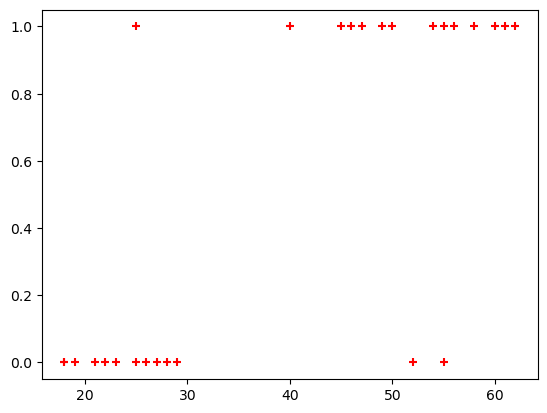

In [3]:
plt.scatter(df.age,df.bought_insurance,marker="+",color="red")

Now we want to do train-test split method to train and test our data

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [7]:
X_train

,age
7,60
0,22
11,28
22,40
14,49
17,58
12,27
9,61
2,47
6,55


In [8]:
X_test

,age
10,18
1,25
5,56


In [9]:
from sklearn.linear_model import LogisticRegression


In [10]:
model = LogisticRegression()

In [11]:
model.fit(X_train,Y_train)

LogisticRegression()

In [12]:
model.predict(X_test)

array([0, 0, 1], dtype=int64)

Now we can see that the first 2 values is zero. ie, the first 2 rows in the test data is youngers with 18 and25 ages.Where as in third row the man is 56 age who is going to buy the insurance.This is predicted perfectly.

In [15]:
model.score(X_test,Y_test)

1.0

Now we can see that model's score is 1.0 that means our model is perfect.It is due to our sample is very small and total size only 27. But if our dataset is large then it makes some mistakes in some samples.At that time may be we get some value less than one.

In [16]:
model.predict_proba(X_test)

array([[0.929703  , 0.070297  ],
       [0.84560005, 0.15439995],
       [0.09940196, 0.90059804]])

it will predict the probability of the samples to take insurance or not. we can see that here the first two rows in the matrix the columns value is high since they did not buy the insurance where as in 3rd row the second column is high since that man will buy insurance.

# End by a small dataset

In [44]:
data=pd.read_csv("files/HR_data.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Data Exploration and visualization


In [45]:
import pandas as pd
left=data[data.left==1]

In [42]:
left.shape

(3571, 10)

In [46]:
retained=data[data.left==0]
retained.shape


(11428, 10)

##### Average numbers for all coumn

In [44]:
group=data.groupby('left').mean()

C:\Users\user\AppData\Local\Temp\ipykernel_20196\3236580683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group=data.groupby('left').mean()


In [45]:
group

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


-->we can see that the satisfaction level of the peoples who is going from firm is low when compared to others 
-->Average monthly hours is higher in the emplooyees  leave from the company.(199 vs 207)
-->promotion_last_others is average is low in the emplooyees who are going form company.

#### Impact of salary on emplooyee Retention

<Axes: xlabel='salary'>

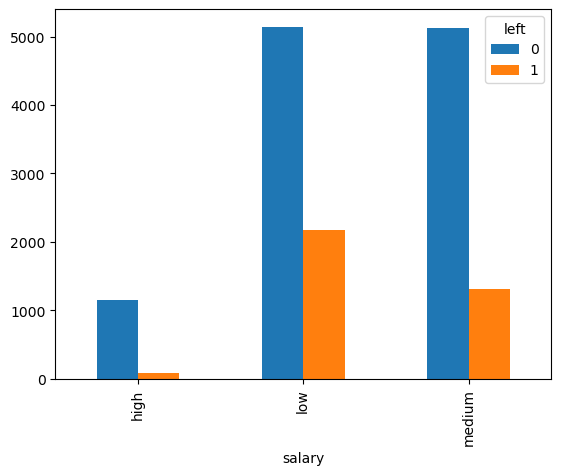

In [46]:
pd.crosstab(data.salary,data.left).plot(kind="bar")

This bar chart show that the emplooyee with high salary didn't have any interest to leave the company.

#### Department wise emplooyee retention rate

<Axes: xlabel='Department'>

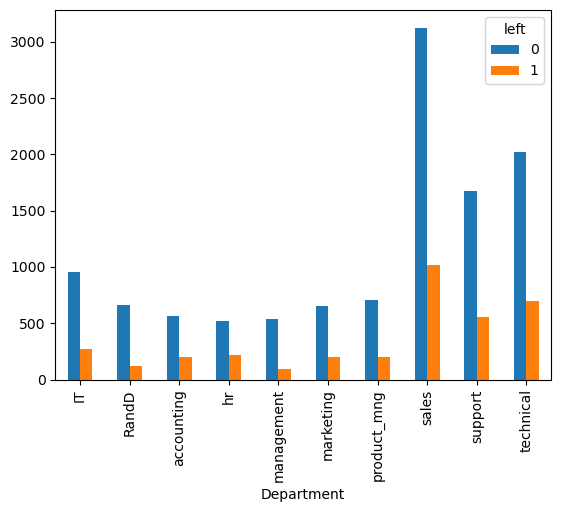

In [47]:
pd.crosstab(data.Department,data.left).plot(kind="bar")

we can see that the Department on emplooyee_retention is not make a major impact. so we can remove it from our analysis.

In [47]:
subdf = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


salary has all text data , it is converted into numbers for that we use dummy variable.


In [48]:
import pandas as pd
salary_dummies=pd.get_dummies(subdf.salary)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [49]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [50]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [51]:
X=df_with_dummies
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [56]:
X.drop('salary',axis='columns',inplace=True)
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [52]:
y=data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

LogisticRegression()

Now the model is become trained.

In [60]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
model.score(X_test,y_test)

0.7686666666666667

#### Multiclass classification

In [85]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [86]:
digits=load_digits()

it will load the load_digits dataset into digits


In [87]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [88]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

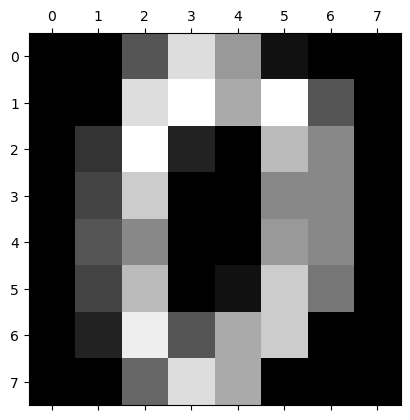

In [90]:
plt.gray()
plt.matshow(digits.images[0])

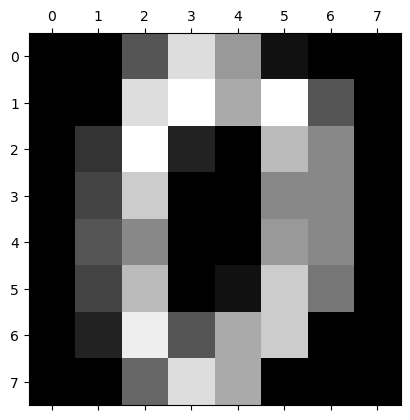

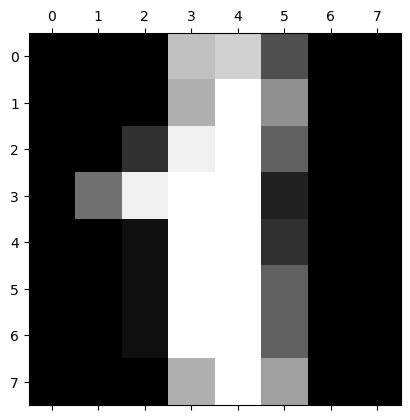

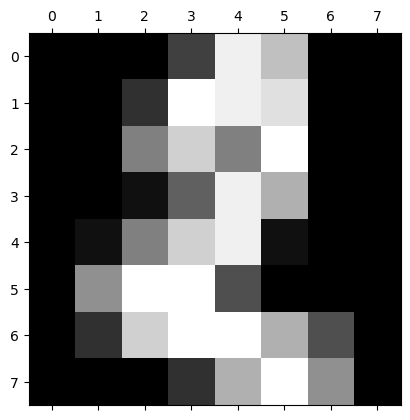

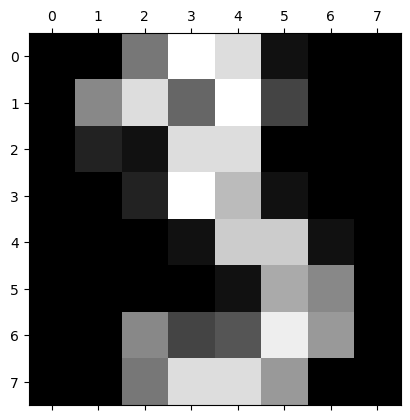

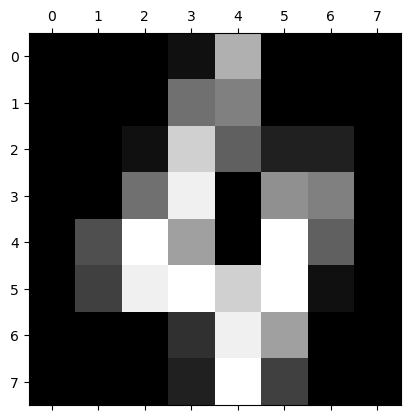

In [91]:
for i in range(5):
    plt.matshow(digits.images[i])

In [93]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

This target variable say that the given images are the 0,1,2,3,4.. respectively.

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [96]:
len(X_train)

1437

In [97]:
len(X_test)

360

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()

In [100]:
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now the model is becomes trained

In [101]:
model.score(X_test,y_test)

0.9666666666666667

before predicting i will be pick up some random sample

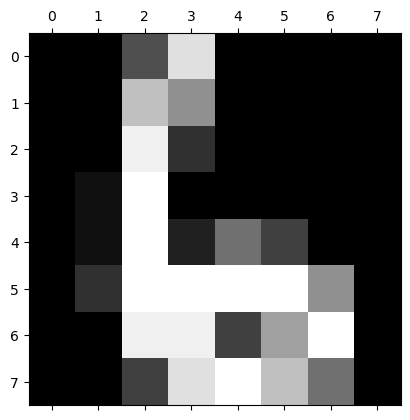

In [102]:
plt.matshow(digits.images[67])

In [103]:
digits.images[67]

array([[ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  9.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 16.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., 16.,  2.,  7.,  4.,  0.,  0.],
       [ 0.,  3., 16., 16., 16., 16.,  9.,  0.],
       [ 0.,  0., 15., 15.,  4., 10., 16.,  0.],
       [ 0.,  0.,  4., 14., 16., 12.,  7.,  0.]])

In [104]:
digits.target[67]

6

Now the selected random value is actually 6.

Now iam going to predict it is true or not.

In [106]:
model.predict([digits.data[67]])

array([6])

which is true

Now i want to predict 0 to 5 data images

In [107]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

we store all the predicted datas in y_predicted to compare it with real using confusion_matrix

In [109]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix


In [111]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  1,  1,  0,  0,  0,  1,  0],
       [ 0,  0, 40,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  1,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 31,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  1,  0,  0,  2,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 23]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

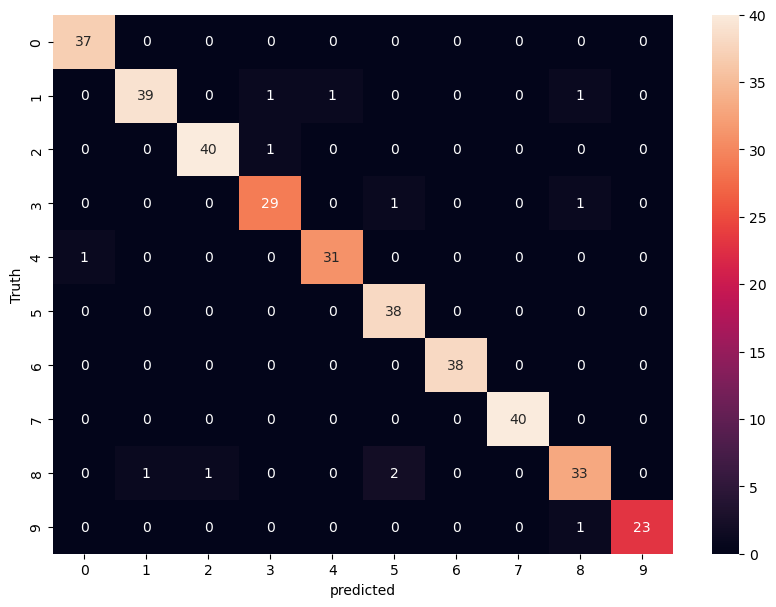

In [112]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

##### That means confusion_matrix is nice way for understanding the predicted and real values accuracy

# Naive Bayes Classifier

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [115]:
data=pd.read_csv("files/titanic.csv")

In [143]:
data.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [134]:
data.shape

(891, 12)

In [144]:
newdf=data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
newdf

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


Now i want to seperate the target variable or output and independent variables.

In [147]:
target=newdf.Survived
inputs=newdf.drop(['Survived'],axis='columns')

In [145]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [148]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


we can see that the Sex column is string so ML models feel difficult to learn so we want to create dummy columns to clear that.

In [149]:
dummi= pd.get_dummies(inputs.Sex)
dummi

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [151]:
newdf=pd.concat([inputs,dummi],axis='columns')
newdf

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [152]:
newdf.drop(['Sex'],inplace=True,axis='columns')


In [153]:
newdf

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [154]:
newdf.columns[newdf.isna().any()]

Index(['Age'], dtype='object')

The above code gives you in any columns contain NAN values. This says that Age column contain null values.

In [155]:
newdf.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [156]:
newdf.Age=newdf.Age.fillna(newdf.Age.mean())

In [158]:
newdf[:10]

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newdf,target,test_size=0.2)

In [172]:
len(X_train)

712

In [173]:
len(X_test)

179

In [174]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [175]:
model.fit(X_train,y_train)

GaussianNB()

In [176]:
model.score(X_test,y_test)

0.8100558659217877

In [177]:
X_test[:10]

,Pclass,Age,Fare,female,male
600,2,24.000000,27.0000,1,0
830,3,15.000000,14.4542,1,0
421,3,21.000000,7.7333,0,1
132,3,47.000000,14.5000,1,0
7,3,2.000000,21.0750,0,1
247,2,24.000000,14.5000,1,0
451,3,29.699118,19.9667,0,1
182,3,9.000000,31.3875,0,1
492,1,55.000000,30.5000,0,1
306,1,29.699118,110.8833,1,0


In [178]:
y_test[:10]

600    1
830    1
421    0
132    0
7      0
247    1
451    0
182    0
492    0
306    1
Name: Survived, dtype: int64

In [180]:
model.predict(X_test[:10])

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [183]:
y_test[:10]

600    1
830    1
421    0
132    0
7      0
247    1
451    0
182    0
492    0
306    1
Name: Survived, dtype: int64

In [185]:
model.predict_proba(X_test[:10])

array([[4.50629701e-02, 9.54937030e-01],
       [8.36679096e-02, 9.16332090e-01],
       [9.88257189e-01, 1.17428108e-02],
       [1.11539058e-01, 8.88460942e-01],
       [9.79735915e-01, 2.02640855e-02],
       [4.75711732e-02, 9.52428827e-01],
       [9.89991350e-01, 1.00086496e-02],
       [9.82589943e-01, 1.74100573e-02],
       [9.12597595e-01, 8.74024054e-02],
       [2.08712903e-04, 9.99791287e-01]])

#### Sparm detection using Naive bayes

In [1]:
import pandas as pd
data=pd.read_csv("files/sparm.csv")

In [2]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

i just want to change these into numbericals that's why ml models can learn this .

In [5]:
data['Sparm']=data['Category'].apply(lambda x:1 if x=="spam" else 0)

In [6]:
data.head()

,Category,Message,Sparm
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Sparm,test_size=0.25)

In [18]:
len(X_train)

4179

In [19]:
len(X_test)

1393

i just want to create a matrix of numbers that refers to the messages by using countvectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

In [27]:
X_train_count=v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [30]:
model.fit(X_train_count,y_train)

MultinomialNB()

Now the model is become trained we can now to try prediction

In [33]:
emails=[
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count=v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [35]:
X_test_count= v.transform(X_test)
model.score(X_test_count,y_test)

0.9856424982053122

###### i can achive this also using pipeline class

In [37]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [38]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
clf.score(X_test,y_test)

0.9856424982053122

# K- Nearest Neighbours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("files/dataset_Knn.csv",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Here TARGET CLASS  is our dependent feature, we want to remove that . And the other features are independent and i want to standardize the data features since these features are may be calculated in different units.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [8]:
scaler_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
df_feat=pd.DataFrame(scaler_feature,columns=df.columns[:-1])

In [10]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaler_feature,df['TARGET CLASS'],test_size=0.3)

In [16]:
X_train.shape

(700, 10)

In [17]:
y_train.shape

(700,)

In [18]:
y_test.shape

(300,)

In [15]:
X_test.shape

(300, 10)

##### prediction and evaluation

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=1)

initially i choosed the k value will 1. after calculating results i will find a better k value.

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
predicted=knn.predict(X_test)

now we can see the accuracy of our model and see the confusion matrix.

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,predicted))

[[142  10]
 [ 10 138]]


In [26]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       152
           1       0.93      0.93      0.93       148

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



now i get the best score for this knn model and i want to check if there is another k value which get more than accurate results.

In [28]:
import numpy as np
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicted_i = knn.predict(X_test)
    error_rate.append(np.mean(predicted_i !=y_test))

Here i checked that the unequal values between predicted and y_test, then i get the error-k graph which showing the best k values.

Text(0, 0.5, 'Error value')

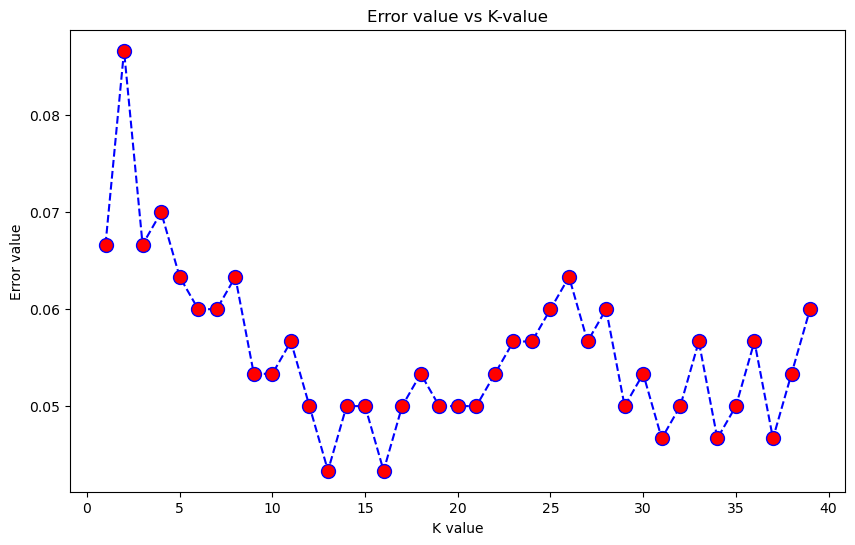

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error value vs K-value")
plt.xlabel("K value")
plt.ylabel("Error value")

From the above graph we can see that the k=13 and k=16 have less error so we choose that, that's why i get most accurate model by choosing the k=16.

In [32]:
knn=KNeighborsClassifier(n_neighbors=16)


In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [34]:
predicted2 =knn.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predicted2))

[[145   7]
 [  6 142]]


In [36]:
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       152
           1       0.95      0.96      0.96       148

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

